<a href="https://colab.research.google.com/github/villafue/Capstone_2_Netflix/blob/main/Springboard/Tutorial/DataCamp/Building%20Recommendation%20Engines%20in%20Python/4%20Matrix%20Factorization%20and%20Validating%20Your%20Predictions/4_Matrix_Factorization_and_Validating_Your_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Factorization and Validating Your Predictions

Understand how the sparsity of real-world datasets can impact your recommendations. Leverage the power of matrix factorization to deal with this sparsity. Explore the value of latent features and use them to better understand your data. Finally, put the models you’ve discovered to the test by learning how to validate each of the approaches you’ve learned.

# Dealing with sparsity

1. Dealing with sparsity

Now you are capable of not only generating recommendations for any user in your dataset, but also predicting what rating users might give items they have not come across using KNN.
2. Sparse matrices

This works great for dense datasets in which every item has been reviewed by multiple people, which ensures that the K nearest neighbors are genuinely similar to your user. But what if the data is less full?
3. Sparse matrices

This is actually a common concern in real-world rating data as the number of users and items are generally quite high and the number of reviews are quite low.
4. Sparse matrices

We call the percentage of a DataFrame that is empty the DataFrame's sparsity. In other words, the number of empty cells over the number of cells with data.
5. Measuring sparsity

Let's bring back a larger version of the book rating DataFrame we used in the last chapter and find how sparse it is.
6. Measuring sparsity

We can check the sparsity of a DataFrame by counting the number of missing values in it using isnull dot values dot sum Finding the full number of cells in the DataFrame using dot size and then dividing the empty count by the total. Here we see that the DataFrame is only just over 1% filled, so it's quite sparse.
7. Why sparsity matters

Why does this matter? This can create problems if we were to use KNN with sparse data because KNN requires you to find the K nearest users that have rated the item. Take the DataFrame here.
8. Why sparsity matters

Let's say we wanted to estimate what User 1 would give item 5. We would find the n nearest ratings of the item,
9. Why sparsity matters

but in this case, there are only 2 KNN or other users that have rated the item.
10. Why sparsity matters

Therefore we would have to return an average of all reviews (2 in this case) because there is no other data. This does not actually take the similarities into account.
11. Measuring sparsity per column

You can understand the scale of this issue by simply counting the number of actual reviews for each book using notnull dot sum. We can see that a large number of books have only received one or two reviews.
12. Matrix factorization

So what alternatives do we have? Thankfully, we can leverage matrix factorization to deal with this problem remarkably well and create some quite interesting features while doing so.
13. Matrix factorization

Matrix factorization is when we decompose the user-rating matrix into the product of two lower dimensionality matrices. These matrices shown here are factors of the original matrix on the left, if you were to find the product of the two of them it would be this original matrix. By finding factors of the sparse matrix and then multiplying them together
14. Matrix factorization

we can be left will a fully filled matrix. We will dig into matrix factorization in the next few lessons but first we should review how matrix multiplication works.
15. Matrix multiplication

To multiply two rectangular matrices,
16. Matrix multiplication

The number of rows in the first matrix M here
17. Matrix multiplication

and the number of columns in the second matrix N here do not have to match
18. Matrix multiplication

But the number of columns of the first matrix must match the number of rows in the second.
19. Matrix multiplication

This results in an n by m matrix.
20. Matrix multiplication

This same multiplication can be performed in python using numpy's dot product function. Here we can see the dot product of matrix_A (a three by two matrix) and matrix_B (a two by three matrix),
21. Matrix multiplication

Is a three by three matrix.
22. Let's practice!

We can dig into why this is so useful soon, but let's practice what we have learned in this lesson first! 

# Matrix sparsity

A common challenge with real-world ratings data is that most users will not have rated most items, and most items will only have been rated by a small number of users. This results in a very empty or sparse DataFrame.

In this exercise, you will calculate how sparse the movie_lens ratings data is by counting the number of occupied cells and compare it to the size of the full DataFrame. The DataFrame user_ratings_df that you have used in previous exercises, containing a row per user and a column per movie, has been loaded for you.

Instructions

1. Count the number of non-empty cells in user_ratings_df and store the result as sparsity_count.

2. Count the total number of cells in the user_ratings_df DataFrame and store it as full_count.

3. Calculate the sparsity of the DataFrame by dividing the number of non-empty cells by the total number of cells and print the result.


In [ ]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

'''
<script.py> output:
    0.9820950819672131
'''

Conclusion

Good work. As you can see, the DataFrame is over 98% empty. This means that less than 2% of the DataFrame includes any data. This suggests that it would be limited in its value for making predictions using KNN. You will soon learn how to use matrix multiplication to fill out sparse DataFrames like this.

# Limited data in your rows

This data sparsity can cause an issue when using techniques like K-nearest neighbors as discussed in the last chapter. KNN needs to find the k most similar users that have rated an item, but if only less than or equal to k users have given an item the rating, all ratings will be the "most similar".

In this exercise, you will count how often each movie in the user_ratings_df DataFrame has been given a rating, and then see how many have only one or two ratings.

Instructions

1. Count the number of non-empty cells in each column of user_ratings_df and store it as occupied_count.

2. Sort occupied_count from low to high. Looking at the resulting sorted Series, note the number of movies with one review.

3. Create a histogram of the sorted_occupied_count Series you just created. matplotlib.pyplothas been loaded as plt.


In [ ]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()
print(occupied_count)

'''
<script.py> output:
    '71 (2014)                                  1
    'Hellboy': The Seeds of Creation (2004)     1
    'Round Midnight (1986)                      2
    'Salem's Lot (2004)                         1
    'Til There Was You (1997)                   2
                                               ..
    Better Living Through Circuitry (1999)      1
    Better Luck Tomorrow (2002)                 4
    Better Off Dead... (1985)                  27
    Better Than Chocolate (1999)                1
    Better Than Sex (2000)                      1
    Length: 1000, dtype: int64
'''

In [ ]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()

# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()
print(sorted_occupied_count)

'''
<script.py> output:
    '71 (2014)                            1
    Another Earth (2011)                  1
    Another Cinderella Story (2008)       1
    Annie Get Your Gun (1950)             1
    Anne of the Thousand Days (1969)      1
                                       ... 
    Back to the Future (1985)           171
    Aladdin (1992)                      183
    Batman (1989)                       189
    Apollo 13 (1995)                    201
    American Beauty (1999)              204
    Length: 1000, dtype: int64
'''

In [ ]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()

# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()

# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

Conclusion

Great job! You will notice that a very large proportion of the user_ratings_df movies have only one review. This would cause a large amount of difficulty if you were attempting to use KNN as there would not be enough valid 'neighbors'.

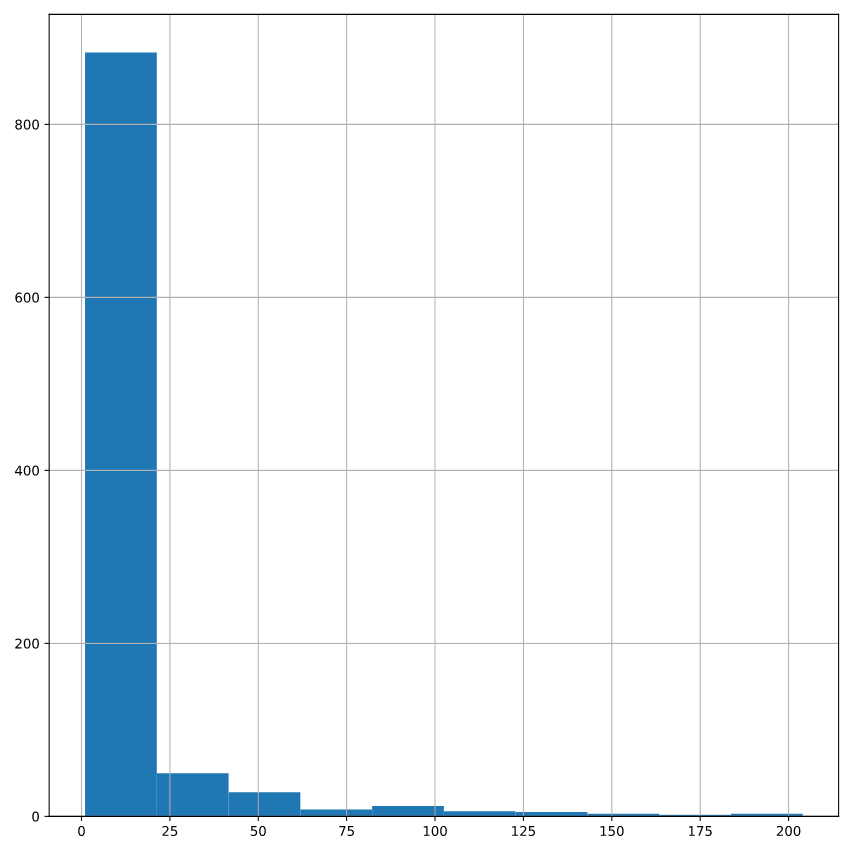

# Matrix multiplication



When multiplying an 10 x 30 matrix by a 30 x 40 matrix, what size matrix is generated?

Possible Answers

 * 40 x 10
  - Incorrect. The output matrix takes the number of rows from the first matrix, and the number of columns from the second.

 * 30 x 30
- Incorrect. While the inner two dimensions must equal each other, they do not impact the final size of the matrix.

 * 10 x 40
 - Correct! The output matrix takes the number of rows from the first matrix and the number of columns from the second. The inner two dimensions must equal each other, but they do not impact the final size of the matrix. This will become important in the next lesson as you find matrices' factors.

 * 10 x 30 x 40
 - Incorrect. When two 2-D matrices are multiplied, the resulting matrix is also two-dimensional.

# Matrix factorization

1. Matrix factorization

Time to understand how matrix factorization can be performed and what value it brings.
2. Why this helps with sparse matrices

Like we mentioned in the last video, just as matrices can be multiplied together, they can be broken into their factors.
3. Why this helps with sparse matrices

A huge benefit of this, when performed in conjunction with recommendation systems, is that factors can be found as long as there is at least one value in every row and column. Or in other words every user has given at least one rating, and every item has been rated at least once. Why is this valuable? Because we can multiply these factors together to create a fully filled in matrix.
4. Why this helps with sparse matrices

That's right, it will calculate what values should be in these gaps based off of the incomplete matrix's factors. We will go into further depth about how we do this in the next lesson, but first, let's run through how we would factor our matrices.
5. What matrix factorization looks like

Matrix factorization breaks a matrix into two component matrices. Take a rating matrix
6. What matrix factorization looks like

with M users as rows
7. What matrix factorization looks like

and the N items they rated as the columns. Matrix factorization will break this down into one matrix with its depth equal to the number of users and one matrix with its width equal to the number of items.
8. What matrix factorization looks like

The number of values in the newly created dimensions shown here are called the rank of the matrix and must be equal to each other and can be decided by us. You may be wondering what these new unlabeled columns and rows represent, they are called latent features. These are the features that the matrix factorization view as mathematically the best ways to describe or sum up this data set in the least number of features.
9. Latent features

To explain what that entails, let's take a closer look at a small example. Here we see four users and how they have rated six books and the decomposed version of the ratings matrix. You can see that the original matrix has six columns but the first matrix that is a factor only has two columns.
10. Latent features

Taking a look at latent feature 1, we can see that users who gave high ratings to horror and fantasy books got relatively high values for this feature,
11. Latent features

while for latent feature 2, a high value appears to correspond with users who preferred romance novels. This is a simplified example, and often latent features become harder to label with larger datasets, but these are features that the matrix factorization has calculated as representing patterns in the original matrix.
12. Information loss

One question that might come to mind when you see these large DataFrames
13. Information loss

being reduced to much smaller factor matrices is, how can it do this without losing information? In reality, you can't reduce down these matrices without at least some information loss - these factors are just close approximations of the original data.
14. Information loss

If we were to multiply the factors back together
15. Information loss

we would actually see a slight difference between the first and last matrix. Even the values we had originally may be off by a small fraction. This is nothing to worry about, but worth flagging so you are not surprised when matrices do not exactly match up.
16. Let's practice!

Now its time to identify some real world latent features. 

# Identifying latent features

Print original_df and user_matrix using the console. The user_matrix is one of the factors of the original_df. Based on the values in the first column of the user_matrix, what do you think the latent feature may be summarizing?

Note the first row of user_matrix corresponds to User 1, the second row to User_2, and so on. Remember that latent features tend to represent underlying trends in the data and give items with these underlying trends similar scores.

Possible Answers

1. A preference for romance movies.
 - Incorrect. Users who have a high value for this latent feature have tended to score one of the two movie types mentioned high and the other low.

2. A preference for horror movies.
 - Incorrect. In fact, users who have a high value for this latent feature have tended to score romance movies high and horror movies low.

3. No preference for horror or romance movies.
 - Incorrect. Users who have a high value for this latent feature have tended to score one of the two movie types mentioned high and the other low.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_centered)

In [1]:
original_df
Out[1]:

        Alien  Scream  Love Actually  The Notebook
User_1    5.0     4.0            2.0           1.0
User_2    2.0     1.0            4.0           5.0
User_3    1.0     3.0            5.0           4.0
User_4    4.0     5.0            1.0           2.0
User_5    1.0     1.0            5.0           5.0

In [2]:
user_matrix
Out[2]:

array([[-3.9202913 ,  5.43628339],
       [ 2.01738539,  6.37262296],
       [ 1.46328822,  6.84850675],
       [-3.88683688,  5.47272837],
       [ 3.00873893,  6.54960159]])

# Information loss in factorization

You may wonder how the factors with far fewer columns can summarize a larger DataFrame without loss. In fact, it doesn't — the factors we create are generally a close approximation of the data, as it is inevitable for some information to be lost. This means that predicted values might not be exact, but should be close enough to be useful.

In this exercise, you will inspect the same original pre-factorization DataFrame from the last exercise loaded as original_df, and compare it to the product of its two factors, user_matrix and item_matrix.

Instructions

1. Find the dot product of user_matrix and item_matrix and store it as predictions_df.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_centered)
In [1]:
user_matrix
Out[1]:

array([[-0.92214831,  0.46868881, -3.93546218,  6.20017019],
       [ 0.29451291,  1.1337195 ,  2.00684562,  7.52205181],
       [-0.23338272, -1.58223229,  1.42823577,  7.4428733 ],
       [ 0.93640606, -0.2676827 , -3.90282275,  6.23040608],
       [-0.07751554,  0.26188815,  2.99513239,  7.67609853]])
In [2]:
item_matrix
Out[2]:

array([[-0.31315676,  0.27223577,  0.11236206, -0.6851852 ,  0.58797665],
       [ 0.53506273, -0.67846698,  0.34679691, -0.33676863,  0.14038957],
       [-0.58681644, -0.56753532,  0.01699735,  0.40147032,  0.41482863],
       [ 0.34689509,  0.37669009,  0.48522268,  0.50094181,  0.50138271]])

In [ ]:
import numpy as np

# Multiply the user and item matrices
predictions_df = np.dot(user_matrix, item_matrix)
# Inspect the recreated DataFrame
print(predictions_df)

# Inspect the original DataFrame and compare
print(original_df)

<script.py> output:
    [[4.99975742 4.00002481 3.00049612 1.99995591 0.99971313]
     [1.9460952  1.00551227 4.11024369 3.99020218 4.93625288]
     [0.97027585 3.00303957 3.06079051 4.99459729 3.9648486 ]
     [4.01506894 4.99845906 2.96918168 1.00273895 2.01782033]
     [1.06960909 0.99288182 3.8576386  5.01265226 5.08231881]]
   
            Alien  Scream  Scream 2  Love Actually  The Notebook
    User_1    5.0     4.0       3.0            2.0           1.0
    User_2    2.0     1.0       4.0            4.0           5.0
    User_3    1.0     3.0       3.0            5.0           4.0
    User_4    4.0     5.0       3.0            1.0           2.0
    User_5    1.0     1.0       4.0            5.0           5.0

Conclusion

Good work! Although the product of the two factors is very close to the original DataFrame, quite a bit of accuracy has been lost from reducing it to only two latent features. In the next lesson, you will learn how to find your base matrix factors yourself.

# Singular value decomposition (SVD)

1. Singular value decomposition (SVD)

There are many ways to find the factors of a matrix, but we will use a technique called singular value decomposition.
2. What SVD does

Like any matrix factorization approach, singular value decomposition finds factors for your matrix.
3. What SVD does

U is the user matrix
4. What SVD does

V transpose is the features matrix (transpose in this case means that V has been flipped over its diagonal, but we do not need to worry about that here)
5. What SVD does

but it also generates sigma as seen here, which is simply a diagonal matrix which can be thought of as the weights of the latent features, or how large an impact they are calculated to have.
6. Prepping our data

We will once again be working with a DataFrame containing book ratings called book_ratings_df. Before we get started, we should take a look at its dimensions using dot shape. For SVD to optimally work, we will need to center the data by deducting the row average from each row as we did in the third chapter. For this we find the row means for each user
7. Prepping our data

and subtract them from the matrix on a row-level. Once the DataFrame has been centered we can fill all the empty values with 0s without influencing the overall ratings.
8. Applying SVD

With the dataset normalized, we can import SVDs from scipy and apply it to our DataFrame. You can specify k, the number of latent features being generated, but in this case, we will use the default of 6. The SVD generates U, sigma, and Vt. Let's take a look at the shape of each of them. Here, we see U with the same number of rows as the original matrix, and k columns, and Vt with the same number of columns as the original matrix, and k rows.
9. Applying SVD

Finally, we should take a look at sigma. Note that although we expected a diagonal matrix for sigma, we get a list. This can be converted to a matrix using numpy's diag function.
10. Getting the final matrix

Now that we have the full factor matrices, we can multiply them together to find the full utility matrix.
11. Getting the final matrix

We find the dot product of U and sigma
12. Getting the final matrix

and then find the dot product of the result and V transpose
13. Getting the final matrix

to get the full matrix.
14. Calculating the product in Python

This can be done in Python using numpy's dot product function. First, we take the dot product of U and sigma.
15. Calculating the product in Python

And then the dot product of the result and V transpose. Note that these numbers look low because they have been centered.
16. Add averages back

Therefore we need to add the values we deducted earlier back. We extract the values from the average values series and reshape it so it can be deducted row-wise from the matrix. Upon inspection, we can see that we have been able to fill in the missing values for the DataFrame with reasonable calculated values. Below we have the original DataFrame for comparison.
17. Let's practice!

Now it's your turn to try it out with the movie dataset. 

# Normalize your data

Before you can find the factors of the ratings matrix using singular value decomposition, you will need to "de-mean", or center it, by subtracting each row's mean from each value in that row.

In this exercise, you will begin prepping the movie rating DataFrame you have been working with in order to be able to perform Singular value decomposition.

user_ratings_df contains a row per user and a column for each movie and has been loaded for you.

Instructions

1. Find the average rating each user has given across all the movies they have seen and store these values as avg_ratings.

2. Subtract the row averages from their respective rows and store the result as user_ratings_centered.

3. Finally, fill in all missing values in user_ratings_centered with zeros.

4. Print the average of each column in user_ratings_centered to show they have been de-meaned.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_centered)
In [1]:
user_ratings_df.head()
Out[1]:

   User_'71 (2014)  User_'Hellboy': The Seeds of Creation (2004)  User_'Round Midnight (1986)  User_'Salem's Lot (2004)  User_'Til There Was You (1997)  ...  \
0              NaN                                           NaN                          NaN                       NaN                             NaN  ...   
2              NaN                                           NaN                          NaN                       NaN                             NaN  ...   
3              NaN                                           NaN                          NaN                       NaN                             NaN  ...   
4              NaN                                           NaN                          NaN                       NaN                             NaN  ...   
5              NaN                                           NaN                          NaN                       NaN                             NaN  ...   

   User_Better Living Through Circuitry (1999)  User_Better Luck Tomorrow (2002)  User_Better Off Dead... (1985)  User_Better Than Chocolate (1999)  User_Better Than Sex (2000)  
0                                          NaN                               NaN                             NaN                                NaN                          NaN  
2                                          NaN                               NaN                             NaN                                NaN                          NaN  
3                                          NaN                               NaN                             NaN                                NaN                          NaN  
4                                          NaN                               NaN                             NaN                                NaN                          NaN  
5                                          NaN                               NaN                             NaN                                NaN                          NaN  

[5 rows x 1000 columns]

In [ ]:
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=1)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

'''
<script.py> output:
    0      0.0
    2      0.0
    3      0.0
    4      0.0
    5      0.0
          ... 
    605    0.0
    606    0.0
    607    0.0
    608    0.0
    609    0.0
    Length: 589, dtype: float64
'''

Conclusion

Great work, now that you have the data de-meaned, you will be able to perform singular value decomposition on the data and find its factors!

# Decomposing your matrix

Now that you have prepped your data by centering it and filling in the remaining empty values with 0, you can get around to finding your data's factors. In this exercise, you will break the user_ratings_centered data you generated in the last exercise into 3 factors: U, sigma, and Vt.

 * U is a matrix with a row for each user
 * Vt has a column for each movie
 * sigma is an array of weights that you will need to convert to a diagonal matrix

The user_ratings_centered that you created in the last lesson has been loaded for you.

Instructions

1. Import svds from scipy.sparse.linalg.

2. Decompose user_ratings_pivot_centered into its factor matrices: U, sigma and Vt.

3.  Convert the sigma array into a diagonal matrix.


In [ ]:
In [2]:
user_ratings_centered.head()
Out[2]:

        '71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Round Midnight (1986)  'Salem's Lot (2004)  'Til There Was You (1997)  ...  Better Living Through Circuitry (1999)  \
User_0         0.0                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
User_1         0.0                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
User_2         0.0                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
User_3         0.0                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
User_4         0.0                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   

        Better Luck Tomorrow (2002)  Better Off Dead... (1985)  Better Than Chocolate (1999)  Better Than Sex (2000)  
User_0                          0.0                        0.0                           0.0                     0.0  
User_1                          0.0                        0.0                           0.0                     0.0  
User_2                          0.0                        0.0                           0.0                     0.0  
User_3                          0.0                        0.0                           0.0                     0.0  
User_4                          0.0                        0.0                           0.0                     0.0  

[5 rows x 1000 columns]

In [ ]:
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

'''
<script.py> output:
    [[14.63345909  0.          0.          0.          0.          0.        ]
     [ 0.         14.87028285  0.          0.          0.          0.        ]
     [ 0.          0.         15.59548313  0.          0.          0.        ]
     [ 0.          0.          0.         16.95141154  0.          0.        ]
     [ 0.          0.          0.          0.         18.00519639  0.        ]
     [ 0.          0.          0.          0.          0.         26.44511465]]
'''

Conclusion

Fantastic, you can use these factorized matrices to build a fully populated ratings DataFrame!

# Recalculating the matrix

Now that you have your three factor matrices, you can multiply them back together to get complete ratings data without missing values. In this exercise, you will use numpy's dot product function to multiply U and sigma first, then the result by Vt. You will then be able add the average ratings for each row to find your final ratings.

U, sigma, Vt, avg_ratings, and user_ratings_df from the previous exercise have been loaded for you. Also, numpy has been loaded as np.

Instructions

1. Find the dot product of the matrix U and sigma.

2. Find the dot product of U_sigma and Vt and print the result.

3. Reshape the values of avg_ratings and add them back onto U_sigma_Vt.

4. Create a DataFrame of the results using the original index and column names from user_ratings_df.


In [ ]:
In [1]:
U
Out[1]:

array([[-2.53981880e-02, -1.82432854e-02,  6.56053972e-03,
        -1.77035634e-02, -1.46922765e-02,  8.90777301e-03],
       [-1.40760083e-04,  6.49529499e-03, -1.22737785e-05,
         4.57154890e-03,  2.67042018e-03,  1.80473844e-03],
       [-3.45237033e-03, -1.55516654e-02,  2.08237897e-02,
         2.70217774e-02, -5.81958737e-03,  6.84094183e-03],
       ...,
       [-1.51711203e-02,  9.20817611e-02,  1.12288448e-02,
         1.58603555e-01, -1.04720236e-02,  8.10837384e-02],
       [ 2.02052489e-18, -1.00020736e-18,  9.01880290e-19,
         9.54975735e-19,  7.80676461e-19, -5.88917662e-19],
       [ 1.10828765e-01,  8.62577174e-02, -3.26860517e-02,
        -1.03669163e-02, -1.48996590e-02,  1.33897454e-01]])

In [2]:
sigma
Out[2]:

array([[14.63345909,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        , 14.87028285,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , 15.59548313,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 16.95141154,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 18.00519639,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        26.44511465]])

In [3]:
Vt
Out[3]:

array([[ 2.52455153e-03, -2.89467023e-04,  3.62171175e-04, ...,
        -1.55459590e-02, -8.93961713e-04, -1.38964074e-02],
       [ 1.93355922e-03, -3.16764726e-04, -8.27998462e-04, ...,
         4.35213024e-02,  7.09483985e-04,  4.48150544e-03],
       [-6.98622189e-04,  9.61064897e-05,  3.03188008e-03, ...,
        -5.76089868e-02,  4.20894958e-05, -2.91189516e-03],
       [-2.03855518e-04,  8.68595437e-04,  5.53868270e-05, ...,
        -1.57128941e-02,  6.86369113e-04, -1.25313447e-04],
       [-2.75839979e-04,  5.33133875e-04, -2.22285817e-03, ...,
        -3.79363927e-02, -1.75131301e-04,  1.25050277e-04],
       [ 1.68774026e-03,  7.08714154e-04, -1.65758989e-03, ...,
         3.43353303e-02, -9.54892750e-04,  9.23621220e-04]])

In [4]:
avg_ratings
Out[4]:

User_0      4.454545
User_2      2.750000
User_3      4.210526
User_4      3.500000
User_5      3.541667
              ...   
User_605    3.665138
User_606    3.700000
User_607    3.128049
User_608    3.000000
User_609    3.666667
Length: 589, dtype: float64

In [5]:
user_ratings_df
Out[5]:

          '71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Round Midnight (1986)  'Salem's Lot (2004)  'Til There Was You (1997)  ...  Better Living Through Circuitry (1999)
User_0           NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_2           NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_3           NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_4           NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_5           NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
...              ...                                      ...                     ...                  ...                        ...  ...                                     ...   
User_605         NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_606         NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_607         NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_608         NaN                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   
User_609         4.0                                      NaN                     NaN                  NaN                        NaN  ...                                     NaN   

          Better Luck Tomorrow (2002)  Better Off Dead... (1985)  Better Than Chocolate (1999)  Better Than Sex (2000)  
User_0                            NaN                        NaN                           NaN                     NaN  
User_2                            NaN                        NaN                           NaN                     NaN  
User_3                            NaN                        NaN                           NaN                     NaN  
User_4                            NaN                        NaN                           NaN                     NaN  
User_5                            NaN                        NaN                           NaN                     NaN  
...                               ...                        ...                           ...                     ...  
User_605                          NaN                        NaN                           NaN                     NaN  
User_606                          NaN                        NaN                           NaN                     NaN  
User_607                          NaN                        NaN                           NaN                     NaN  
User_608                          NaN                        NaN                           NaN                     NaN  
User_609                          NaN                        NaN                           NaN                     NaN  

[589 rows x 1000 columns]

In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Print the result
print(U_sigma_Vt)

'''
<script.py> output:
    [[-1.00258090e-03 -3.13996916e-05  5.81155899e-04 ...  1.09163414e-02
      -2.40503801e-04  3.87320083e-03]
     [ 2.33179634e-04  9.67519507e-05 -2.62997186e-04 ...  2.84364648e-03
       6.95555338e-05  5.02418651e-04]
     [-5.60719501e-04  5.89305743e-04  1.11622245e-03 ... -2.49989125e-02
       5.47562561e-05 -1.18340483e-03]
     ...
     [ 5.08768179e-03  3.40176994e-03 -3.66951278e-03 ...  9.14879300e-02
       1.00813402e-03  1.03316023e-02]
     [ 2.59707518e-21  8.02169966e-21  6.11346117e-20 ... -3.23958943e-18
      -1.28715415e-20 -5.33145773e-19]
     [ 1.30165960e-02  1.28908612e-03 -7.30301740e-03 ...  1.94495306e-01
      -4.01609856e-03 -1.20456768e-02]]
'''

In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
print(original_df)

'''
<script.py> output:
              '71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Round Midnight (1986)  'Salem's Lot (2004)  'Til There Was You (1997)  ...  Better Living Through Circuitry (1999)  \
    User_0      4.453543                                 4.454514                4.455127             4.453897                   4.453266  ...                                4.458420   
    User_2      2.750233                                 2.750097                2.749737             2.750263                   2.750053  ...                                2.748891   
    User_3      4.209966                                 4.211116                4.211643             4.211584                   4.210101  ...                                4.225446   
    User_4      3.500024                                 3.500017                3.498562             3.500400                   3.501181  ...                                3.493483   
    User_5      3.541118                                 3.541656                3.537255             3.542141                   3.542988  ...                                3.519332   
    ...              ...                                      ...                     ...                  ...                        ...  ...                                     ...   
    User_605    3.662011                                 3.669527                3.665380             3.674806                   3.665815  ...                                3.735179   
    User_606    3.700098                                 3.699166                3.698761             3.698140                   3.699129  ...                                3.682398   
    User_607    3.133136                                 3.131451                3.124379             3.133927                   3.126718  ...                                3.099893   
    User_608    3.000000                                 3.000000                3.000000             3.000000                   3.000000  ...                                3.000000   
    User_609    3.679683                                 3.667956                3.659364             3.667603                   3.671040  ...                                3.540608   
    
              Better Luck Tomorrow (2002)  Better Off Dead... (1985)  Better Than Chocolate (1999)  Better Than Sex (2000)  
    User_0                       4.454812                   4.465462                      4.454305                4.458419  
    User_2                       2.750071                   2.752844                      2.750070                2.750502  
    User_3                       4.208879                   4.185527                      4.210581                4.209343  
    User_4                       3.502543                   3.491329                      3.499191                3.499628  
    User_5                       3.548889                   3.560676                      3.540358                3.550130  
    ...                               ...                        ...                           ...                     ...  
    User_605                     3.664021                   3.502381                      3.663660                3.665667  
    User_606                     3.701697                   3.754180                      3.700520                3.707219  
    User_607                     3.128765                   3.219537                      3.129057                3.138380  
    User_608                     3.000000                   3.000000                      3.000000                3.000000  
    User_609                     3.677050                   3.861162                      3.662651                3.654621  
    
    [589 rows x 1000 columns]

#Original DataFrame
              '71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Round Midnight (1986)  'Salem's Lot (2004)  'Til There Was You (1997)  ...  Better Living Through Circuitry (1999)  \
    User_0      0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_2      0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_3      0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_4      0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_5      0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    ...              ...                                      ...                     ...                  ...                        ...  ...                                     ...   
    User_605    0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_606    0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_607    0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_608    0.000000                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    User_609    0.333333                                      0.0                     0.0                  0.0                        0.0  ...                                     0.0   
    
              Better Luck Tomorrow (2002)  Better Off Dead... (1985)  Better Than Chocolate (1999)  Better Than Sex (2000)  
    User_0                            0.0                        0.0                           0.0                     0.0  
    User_2                            0.0                        0.0                           0.0                     0.0  
    User_3                            0.0                        0.0                           0.0                     0.0  
    User_4                            0.0                        0.0                           0.0                     0.0  
    User_5                            0.0                        0.0                           0.0                     0.0  
    ...                               ...                        ...                           ...                     ...  
    User_605                          0.0                        0.0                           0.0                     0.0  
    User_606                          0.0                        0.0                           0.0                     0.0  
    User_607                          0.0                        0.0                           0.0                     0.0  
    User_608                          0.0                        0.0                           0.0                     0.0  
    User_609                          0.0                        0.0                           0.0                     0.0  
    
    [589 rows x 1000 columns]
'''

Conclusion

Great job! As you can see, although the initial DataFrame had large gaps in the data, the recalculated one is full, and therefore could be used to create better recommendations.

# Making recommendations with SVD

Now that you have the recalculated matrix with all of its gaps filled in, the next step is to use it to generate predictions and recommendations.

Using calc_pred_ratings_df that you generated in the last exercise, with all rows and columns filled, find the movies that User_5 is most likely to enjoy.

Instructions

1. Find the highest ranked movies for User_5 by sorting all the reviews generated for User_5 from high to low.


In [ ]:
In [1]:
calc_pred_ratings_df
Out[1]:

          '71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Round Midnight (1986)  'Salem's Lot (2004)  'Til There Was You (1997)  ...  Better Living Through Circuitry (1999)  
User_0      4.453543                                 4.454514                4.455127             4.453897                   4.453266  ...                                4.458420   
User_2      2.750233                                 2.750097                2.749737             2.750263                   2.750053  ...                                2.748891   
User_3      4.209966                                 4.211116                4.211643             4.211584                   4.210101  ...                                4.225446   
User_4      3.500024                                 3.500017                3.498562             3.500400                   3.501181  ...                                3.493483   
User_5      3.541118                                 3.541656                3.537255             3.542141                   3.542988  ...                                3.519332   
...              ...                                      ...                     ...                  ...                        ...  ...                                     ...   
User_605    3.662011                                 3.669527                3.665380             3.674806                   3.665815  ...                                3.735179   
User_606    3.700098                                 3.699166                3.698761             3.698140                   3.699129  ...                                3.682398   
User_607    3.133136                                 3.131451                3.124379             3.133927                   3.126718  ...                                3.099893   
User_608    3.000000                                 3.000000                3.000000             3.000000                   3.000000  ...                                3.000000   
User_609    3.679683                                 3.667956                3.659364             3.667603                   3.671040  ...                                3.540608   

          Better Luck Tomorrow (2002)  Better Off Dead... (1985)  Better Than Chocolate (1999)  Better Than Sex (2000)  
User_0                       4.454812                   4.465462                      4.454305                4.458419  
User_2                       2.750071                   2.752844                      2.750070                2.750502  
User_3                       4.208879                   4.185527                      4.210581                4.209343  
User_4                       3.502543                   3.491329                      3.499191                3.499628  
User_5                       3.548889                   3.560676                      3.540358                3.550130  
...                               ...                        ...                           ...                     ...  
User_605                     3.664021                   3.502381                      3.663660                3.665667  
User_606                     3.701697                   3.754180                      3.700520                3.707219  
User_607                     3.128765                   3.219537                      3.129057                3.138380  
User_608                     3.000000                   3.000000                      3.000000                3.000000  
User_609                     3.677050                   3.861162                      3.662651                3.654621  

[589 rows x 1000 columns]

In [ ]:
# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc['User_5',:].sort_values(ascending=False)

print(user_5_ratings)

'''
<script.py> output:
    Back to the Future (1985)                       4.163975
    Apollo 13 (1995)                                4.163789
    Beauty and the Beast (1991)                     4.087964
    Aladdin (1992)                                  3.962188
    Airplane! (1980)                                3.812181
                                                      ...   
    American Psycho (2000)                          3.367901
    Aliens (1986)                                   3.351066
    Austin Powers: The Spy Who Shagged Me (1999)    3.327153
    Ace Ventura: When Nature Calls (1995)           2.982156
    Ace Ventura: Pet Detective (1994)               2.628886
    Name: User_5, Length: 1000, dtype: float64
'''

Conclusion

Good work, now you can make predictions for what any user would give any item in the DataFrame even if the original DataFrame is very sparse.

# Validating your predictions

1. Validating your predictions

You have now worked through a few different approaches in predicting how a user may feel about an item they have not seen and from that are able to recommend new items to them that they are most likely to enjoy. For all of these approaches, we have inspected the data to see if it looked correct, but we have not discussed how to measure how accurate these predictions are.
2. Hold-out sets

What makes recommendation engines a little different when measuring predictions is that in more traditional machine learning models,
3. Hold-out sets

you are trying to predict a single feature or column,
4. Hold-out sets

but with recommendation engines, what you are trying to predict is far more inconsistent.
5. Hold-out sets

Almost every user has reviewed different items, and each item has received reviews from different groups of users.
6. Hold-out sets

For this reason, we cannot split our holdout set in the same way that we can for typical machine learning. In those cases, we would just split off a proportion of the row and use them to test our predictions as you see on the left.
7. Hold-out sets

For recommendation engines, on the other hand, we need to remove a different chunk of the DataFrame, as seen on the right.
8. Separating the hold-out set

This can be done in Python by first extracting the area you wish to compare. In our case, we will focus on the top left-hand corner of our base DataFrame consisting of the first 20 rows and the first 100 columns. Here they are selected using iloc. We then blank out the area with NaNs, as this is what we will be predicting. We then repeat the factorization from the last lesson to fill out the full DataFrame, and take a subset of the predicted DataFrame that you want to compare against. We now have the predicted values, and the original actual values that were not used to predict
9. Masking the hold-out set

As we only want to compare the values that did exist, we mask the DataFrame to only compare non-missing fields. Now if we take a look at the masked original DataFrame and the predicted one, we can see that only the values we want to compare are present.
10. Introducing RMSE (root mean squared error)

The metric most commonly used to measure how good a model is at predicting a recommendation is called root mean square error or RMSE for short.
11. Introducing RMSE (root mean squared error)

With RMSE, we first calculate how far from the ground truth each prediction was (this is the error part in RMSE).
12. Introducing RMSE (root mean squared error)

We then square this as we only care about how wrong it is, not in what direction.
13. Introducing RMSE (root mean squared error)

We then find the average square error. The sum of all the errors divided by the total number, using our example shown here would be 5 over 3.
14. Introducing RMSE (root mean squared error)

We then find the square root of this value.
15. Introducing RMSE (root mean squared error)

This gives us a good measure of how close a set of predictions are to the actual values, and is very useful to compare between models.
16. RMSE in Python

The Root mean square error can be found in Python using sklearn's mean_squared_error function, taking the two sets of data you want to compare as its first and second argument. We set the optional argument squared to False so we calculate the root mean square error as opposed to the mean square error.
17. Let's practice!

Great, now you know how to measure how good your recommendations are, let's compare two different approaches. 

# Calculating RMSE

The following data has been loaded in the DataFrame predictions. Either manually, or using the Python console, calculate what the root mean square error (RMSE) of these predictions is.

| Predicted |	Actual |
|----------|---------|
|3 |	4 |
|2 |	1 |
|5 |	3 |

Possible Answers

* 3 / root 6
 - Incorrect: Remember to find the mean (or the average) of the value representing the number of items would need to be the denominator.

* root ( 3 / 6)
 - Incorrect: Remember to find the mean (or the average) of the value representing the number of items would need to be the denominator.

* 6 / root 3
 - Incorrect: Almost. Remember that you need to find the square root of the full equation, not just the denominator.

* root (6 / 3)
 - Correct! RMSE takes the square root of the average error squared. Now you can apply this to your prediction data to see how close it was to the actual values.


# Comparing recommendation methods

In this course, you have predicted how you believe a user would rate movies they have not seen using multiple different methods (basic average ratings, KNN, matrix factorization). In this final exercise, you'll work through a comparison of the averaged ratings and matrix factorization using the mean_squared_error() as the measure of how well they are performing. The predictions based on averages have been loaded as avg_pred_ratings_df while the calculated predictions have been loaded as calc_pred_ratings_df. The ground truth values have been loaded as act_ratings_df.

Finally, the mean_squared_error() function has been imported for your use from sklearn.metrics.

Instructions

1. Extract rows 0-20 and columns 0-100 (the areas that you want to compare) in the act_ratings_df, avg_pred_ratings_df, and calc_pred_ratings_df DataFrames.

2. Create a mask of the actual_values DataFrame that targets only non-empty cells.

3. Find the mean squared error between the two predictions and the ground truth values.


In [ ]:
In [1]:
avg_pred_ratings_df
Out[1]:

            1         2         3         4         5  ...       454       455       456       457       458
0   -0.000273 -0.000273 -0.000273 -0.000273 -0.000273  ... -0.000273 -0.000273 -0.000273  0.629191 -0.000273
1   -0.000525 -0.000525 -0.000525 -0.000525 -0.000525  ... -0.000525 -0.000525 -0.000525 -0.000525 -0.000525
2    0.000018  0.000018  0.000018  0.000018  0.000018  ...  0.000018  0.000018  0.000018  0.000018  0.000018
3    0.000387  0.000387  0.000387  0.000387  0.000387  ...  0.000387  0.000387  0.000387  1.421440  0.000387
4    0.000412  0.000412  0.000412  0.000412  0.000412  ...  0.000412  0.000412  0.000412  0.444857  0.000412
..        ...       ...       ...       ...       ...  ...       ...       ...       ...       ...       ...
395  1.857322  0.000179  0.000179  0.000179  0.000179  ...  0.000179  0.000179  0.000179  0.000179  0.000179
396 -0.000197 -0.000197 -0.000197 -0.000197 -0.000197  ... -0.000197 -0.000197 -0.000197 -0.000197 -0.000197
397  0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000
398  0.055099 -0.000457 -0.000457 -0.000457 -0.000457  ... -0.000457 -0.000457 -0.000457 -0.000457 -0.000457
399 -0.000086 -0.000086 -0.000086 -0.000086 -0.000086  ... -0.000086 -0.000086 -0.000086 -0.000086 -0.000086

[400 rows x 400 columns]

In [2]:
calc_pred_ratings_df
Out[2]:

            0         1         2         3         4  ...       395       396       397       398       399
0    6.670980  5.209519  5.046434  4.355463  4.477881  ...  4.298304  4.569487  4.482124  6.508589  4.352706
1    4.054860  4.009719  3.854787  3.949990  3.928394  ...  4.047494  3.915937  3.950807  4.074458  3.948838
2    2.501992  2.490222  2.511609  2.484290  2.475056  ...  2.451567  2.480562  2.492486  2.541184  2.491379
3    4.606159  3.598486  3.775842  3.605875  3.632134  ...  3.765071  3.564204  3.706584  4.353608  3.609261
4    4.520100  4.249675  3.872521  3.604933  3.931391  ...  4.973189  3.726100  3.549327  5.434189  3.613979
..        ...       ...       ...       ...       ...  ...       ...       ...       ...       ...       ...
395  3.506448  3.286905  3.175207  3.149274  3.193238  ...  3.298484  3.179871  3.149476  3.444694  3.133384
396  3.896269  3.858694  3.934466  3.960730  3.931922  ...  3.966246  3.912275  3.977568  3.939699  3.971941
397  4.530719  4.308165  4.230908  4.251794  4.261548  ...  4.183252  4.271312  4.263262  4.184225  4.243795
398  5.135655  4.296887  3.932518  3.948227  3.972904  ...  4.101042  4.018191  3.964400  4.755848  3.841128
399  5.495461  4.623944  4.350521  4.521719  4.415405  ...  4.821735  4.405674  4.579227  5.577847  4.432656

[400 rows x 400 columns]

In [3]:
act_ratings_df
Out[3]:

       1   2    3   4   5  ...  454  455  456  457  458
0    4.0 NaN  4.0 NaN NaN  ...  NaN  NaN  NaN  5.0  NaN
1    NaN NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN
2    NaN NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN
3    NaN NaN  NaN NaN NaN  ...  NaN  NaN  NaN  5.0  NaN
4    4.0 NaN  NaN NaN NaN  ...  NaN  NaN  NaN  4.0  NaN
..   ...  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...
395  5.0 NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN
396  NaN NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN
397  NaN NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN
398  4.0 NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN
399  NaN NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN

[400 rows x 400 columns]

In [ ]:
# Extract the ground truth to compare your predictions against
actual_values = act_ratings_df.iloc[:20, :100].values
avg_values = avg_pred_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], avg_values[mask], squared=False))
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

'''
<script.py> output:
    3.622399787897257
    1.6415371001781351
'''

Conclusion

Fantastic! You can see that the predictions you created with your newly learned skills generate values that are far more accurate than the baseline averages. Congratulations! You did it! You’re now able to create recommendation engines in Python. Tweet us your feedback and tell us what you think.

# Wrap up

1. Wrap up

Congratulations! You have reached the end of this course on recommendation engines. Let's review what you have learned.
2. Non-personalized models

In chapter 1, you learned what recommendation engines are and how they can be used, and explored how even very basic, non-personalized models can be useful for things like recommending items that have been bought together.
3. Content-based models

In chapter two, you progressed to content-based modeling and learned how it is valuable in cases where you have a lot of information about the items you want to recommend, but maybe not as much about the users in your data.
4. Collaborative filtering

Then in Chapter 3, you moved from knowing a lot about our items to instead having a good understanding of what users liked what, and used collaborative filtering to find new items that would be of interest to our users.
5. Matrix factorization

Finally, in Chapter 4 you learned about how matrix factorization can be used on very sparse datasets, a likely occurrence in real data, to not only generate recommendations but also to learn more about your data using latent features.
6. Congratulations!

Well done, you are now in the position to begin creating your own recommendation engines using your own data! Good luck! 